In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
data <- read_csv("https://github.com/matthewzizek/dsci-100-project/raw/main/data/processed.cleveland.data")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [9]:
cleveland <- data |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

cleveland

age,chol
<dbl>,<dbl>
67,286
67,229
37,250
41,204
56,236
62,268
57,354
63,254
53,203


In [19]:
set.seed(1)

#randomized_data <- data |>
#  sample_frac(1)

#num_rows <- nrow(randomized_data) / 2

#tibble1 <- randomized_data |>
#  slice(1:num_rows) |>
#  select(1, 5) |>
#  rename(age = 1, chol = 2)

#tibble2 <- randomized_data |>
#  slice((num_rows + 1):(num_rows * 2)) |>
#  select(1, 5) |>
#  rename(age = 1, chol = 2)

#tibble1
#tibble2

cleveland_split <- initial_split(tibble, prop = 0.75, strata = age)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
glimpse(cleveland_train)

Rows: 224
Columns: 2
$ age  <dbl> 37, 41, 43, 40, 44, 40, 41, 44, 44, 46, 46, 44, 45, 39, 44, 47, 4…
$ chol <dbl> 250, 204, 247, 167, 233, 199, 198, 290, 219, 177, 231, 197, 208, …


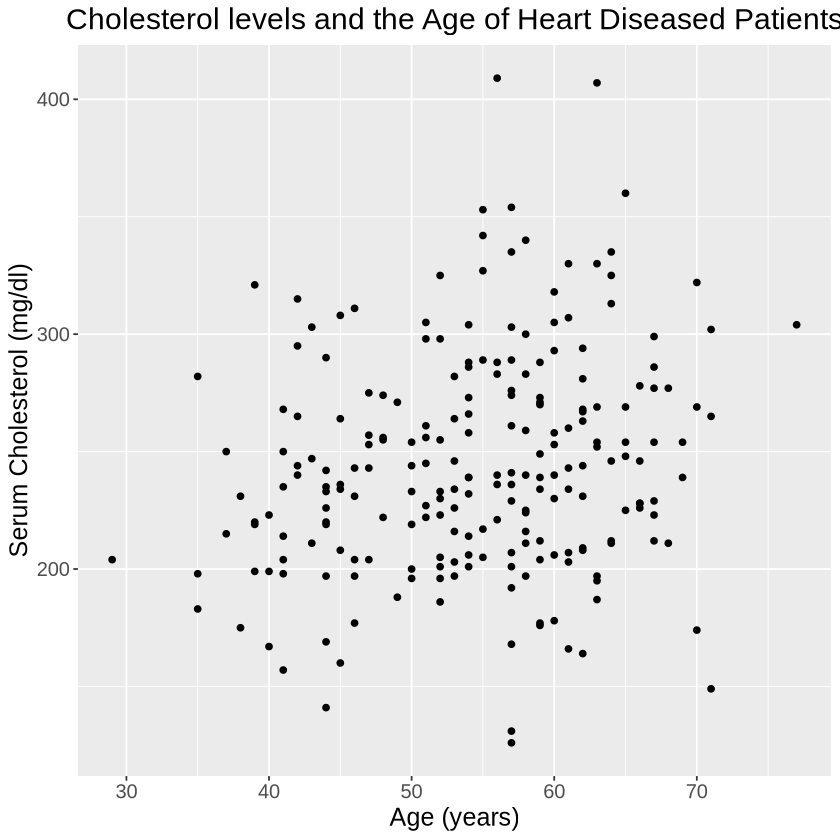

In [17]:
cleveland_plot <- cleveland_train |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_point() +
                    labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)", title = "Cholesterol levels and the Age of Heart Diseased Patients") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_plot

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


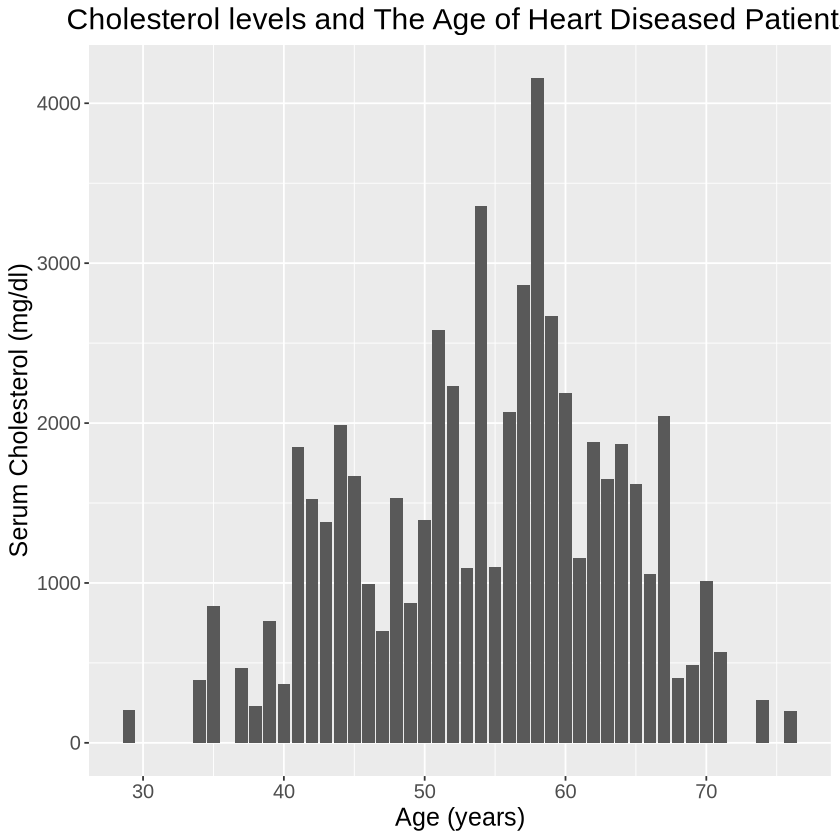

In [10]:
cleveland_histogram <- cleveland_train |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_histogram(stat = "identity") +
                    labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)", title = "Cholesterol levels and The Age of Heart Diseased Patients") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_histogram

## Methods
To conduct our data analysis, we will plot the age of the patients against cholesterol levels using a scatter plot, and then color the data points based on the presence of cardiovascular disease in the patient. Using cholesterol as a predictor, we will then analyze the effect that cholesterol levels have on the development of cardiovascular disease.


## Introduction
Prior research has shown that several risk factors increase the prevalence of heart attacks and heart diseases, including age and high cholesterol levels (above 200 mg/dL). 

Therefore, we will be using data from a valid data set to answer the following predictive question; “Can age and cholesterol levels be used to predict if an individual has a heart disease”. 

The UC Irvine (UCI) Machine Learning Repository contains the Cleveland heart disease dataset that will be used to answer our question. The dataset is used by machine learning researchers to analyze algorithms by answering a variety of predictive questions including predicting heart diseases for patients using many health risk predictors. 

## Expected Outcomes and Significance

We anticipate that as cholesterol levels rise, so does the likelihood of developing cardiovascular disease. This realization, particularly after presenting evidence highlighting the adverse effects of high cholesterol, could motivate individuals to adopt behaviours conducive to maintaining lower cholesterol levels in their daily lives.

## Future Questions
After discussing amongst ourselves we have deduced that some possible questions that this project would lead to include:

What could someone do/avoid to decrease cholesterol levels? 

What other factors may contribute to a higher risk of heart diseas?

What other short and long-term physical effects can be associated with chosterol?  

